<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Make-directory" data-toc-modified-id="Make-directory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Make directory</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Visualization-1~10-images" data-toc-modified-id="Visualization-1~10-images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualization 1~10 images</a></span></li><li><span><a href="#Save-Images" data-toc-modified-id="Save-Images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Save Images</a></span></li></ul></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CIFAR10</a></span><ul class="toc-item"><li><span><a href="#Visualization-airplane-~-truck-images" data-toc-modified-id="Visualization-airplane-~-truck-images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualization airplane ~ truck images</a></span></li><li><span><a href="#Save-images" data-toc-modified-id="Save-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Save images</a></span></li></ul></li></ul></div>

In [139]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dset

import matplotlib.pyplot as plt
import skimage.io as io

import os

import sys
sys.path.append('../code')

from dataload import mnist_load, cifar10_load

# Make directory

In [39]:
if not(os.path.isdir('../images/examples')):
    os.mkdir('../images/examples')
    os.mkdir('../images/examples/mnist')
    os.mkdir('../images/examples/cifar10')

# MNIST

In [136]:
_, _, testloader = mnist_load(1, 0.2, True)
mnist_test = testloader.dataset

# idx2class
mnist_class2idx = mnist_test.class_to_idx
mnist_idx2class = dict(zip(list(mnist_class2idx.values()), list(mnist_class2idx.keys())))
mnist_idx2class

Data Complete


{0: '0 - zero',
 1: '1 - one',
 2: '2 - two',
 3: '3 - three',
 4: '4 - four',
 5: '5 - five',
 6: '6 - six',
 7: '7 - seven',
 8: '8 - eight',
 9: '9 - nine'}

In [219]:
# select image
first_idx_by_class = [np.where(mnist_test.targets==i)[0][0].item() for i in range(10)]
imgs = mnist_test.data.numpy()[first_idx_by_class]
true_classes = mnist_test.targets.numpy()[first_idx_by_class]

## Visualization 1~10 images

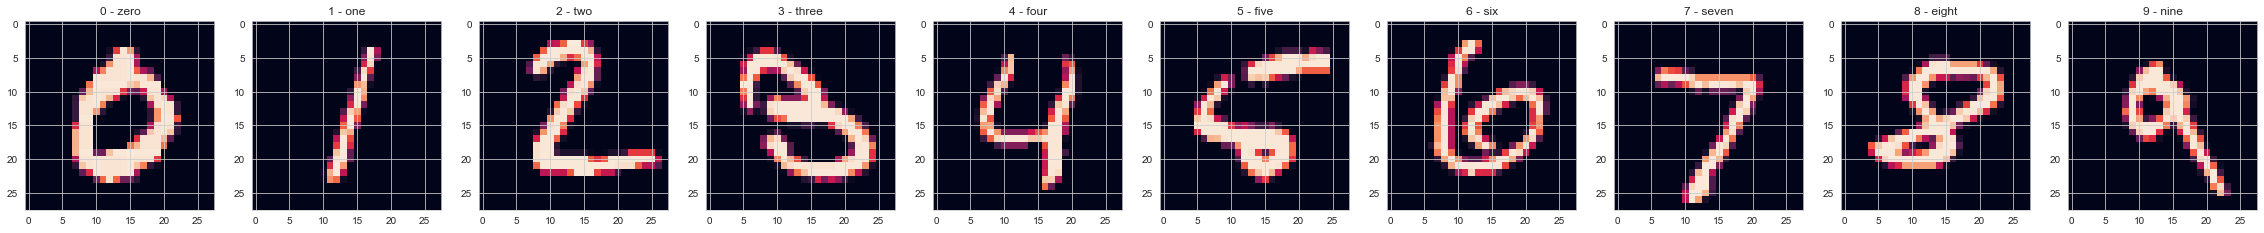

In [21]:
f, ax = plt.subplots(1,10, figsize=(40,5))
for i in range(10):
    ax[i].imshow(imgs[i])
    ax[i].set_title(mnist_idx2class[true_classes[i]])

## Save Images

In [ ]:
for i in range(10):
    io.imsave('../images/examples/mnist/{}.jpg'.format(mnist_idx2class[true_classes[i]]),imgs[i])

# CIFAR10

In [228]:
_, _, testloader = cifar10_load(1, 0.2, True)
cifar10_test = testloader.dataset

# idx2class
cifar10_class2idx = cifar10_test.class_to_idx
cifar10_idx2class = dict(zip(list(cifar10_class2idx.values()), list(cifar10_class2idx.keys())))
cifar10_idx2class

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete


{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [230]:
# select image
first_idx_by_class = [np.where(np.array(cifar10_test.targets)==i)[0][0] for i in range(10)]
imgs = cifar10_test.data[first_idx_by_class]
true_classes = np.array(cifar10_test.targets)[first_idx_by_class]

## Visualization airplane ~ truck images

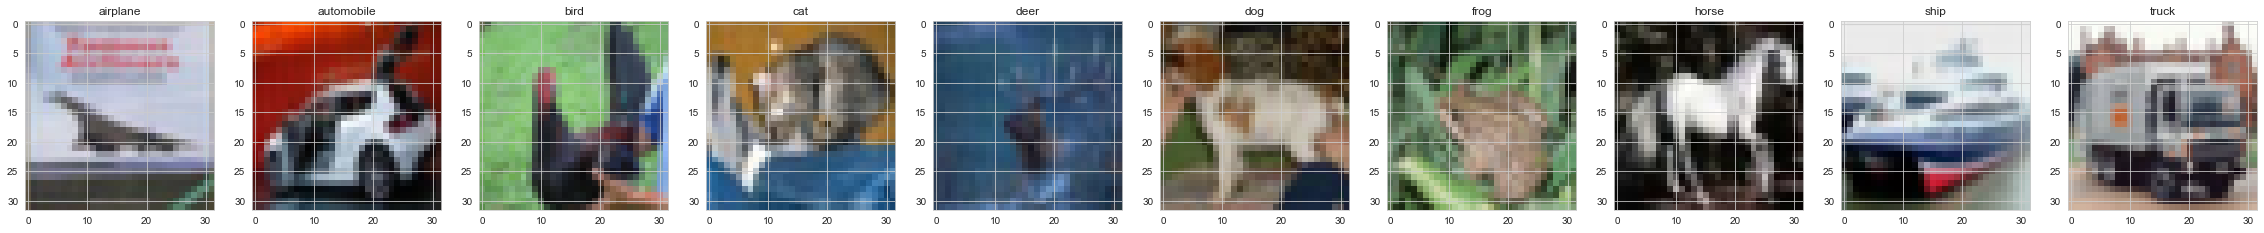

In [23]:
f, ax = plt.subplots(1,10, figsize=(40,5))
for i in range(10):
    ax[i].imshow(imgs[i])
    ax[i].set_title(cifar10_idx2class[true_classes[i]])

## Save images

In [34]:
for i in range(10):
    io.imsave('../images/examples/cifar10/{}.jpg'.format(cifar10_idx2class[true_classes[i]]),imgs[i])